In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid')
df=pd.read_csv("bank-full.csv")
print(df.head())
print(df.tail())
#pd.read_csv()

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
       age           job   marital  education default  balance housing loan  \
45206   51    

Feature Engineering

In [2]:
# Univariate Analysis
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


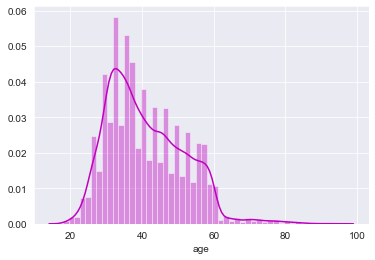

In [12]:
sns.distplot(df['age'],kde=True,color='m')

(array([2.000e+00, 2.800e+01, 3.385e+04, 8.037e+03, 1.919e+03, 6.780e+02,
        3.060e+02, 1.300e+02, 7.300e+01, 6.700e+01, 4.100e+01, 2.600e+01,
        8.000e+00, 7.000e+00, 1.000e+01, 5.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ -8019.        ,  -4871.97142857,  -1724.94285714,   1422.08571429,
          4569.11428571,   7716.14285714,  10863.17142857,  14010.2       ,
         17157.22857143,  20304.25714286,  23451.28571429,  26598.31428571,
         29745.34285714,  32892.37142857,  36039.4       ,  39186.42857143,
         42333.45714286,  45480.48571429,  48627.51428571,  51774.54285714,
         54921.57142857,  58068.6       ,  61215.62857143,  64362.65714286,
         67509.68571429,  70656.71428571,  73803.74285714,  76950.77142857,
         80097.8       ,  83244.8

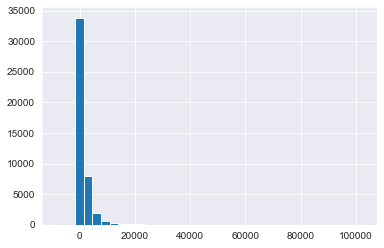

In [21]:
import matplotlib.pyplot as plt
plt.hist(df['balance'],bins=35)

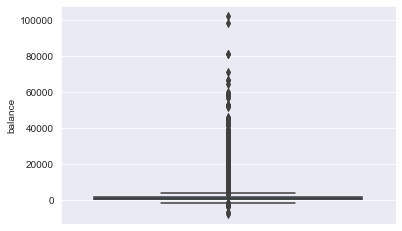

In [25]:
sns.boxplot(df['balance'],orient='vertical')

In [26]:
# Clearly, balance variable has outliers
# Get the percentiles for 'balance' variable
df['balance'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     -8019.0
0.1         0.0
0.2        22.0
0.3       131.0
0.4       272.0
0.5       448.0
0.6       701.0
0.7      1126.0
0.8      1859.0
0.9      3574.0
1.0    102127.0
Name: balance, dtype: float64

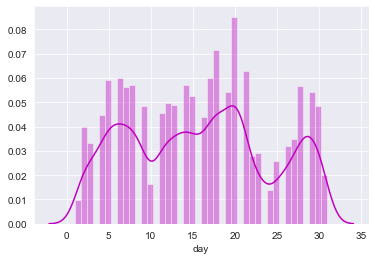

In [28]:
sns.distplot(df['day'],color='m')

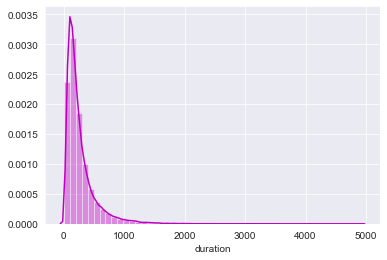

In [29]:
sns.distplot(df['duration'],color='m')

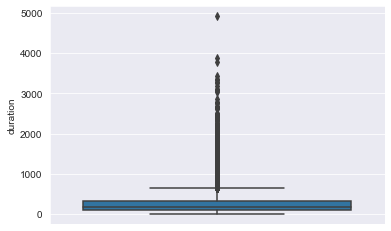

In [31]:
sns.boxplot(df['duration'],orient='vertical')

In [32]:
## Clearly, 'Duration' has outliers

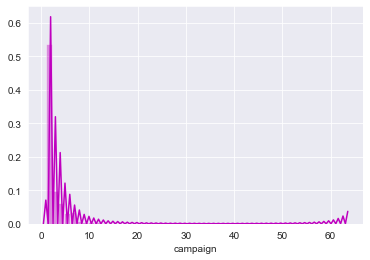

In [33]:
sns.distplot(df['campaign'],color='m')

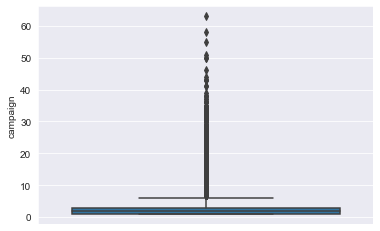

In [34]:
sns.boxplot(df['campaign'],orient='vertical')

In [35]:
## 'Campaign' variable has outliers

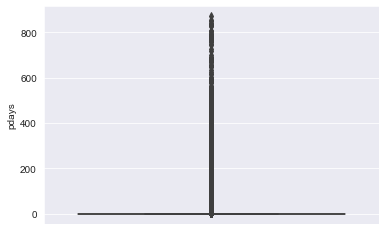

In [38]:
sns.boxplot(df['pdays'],orient='vertical')

In [41]:
df['previous'].nunique()

41

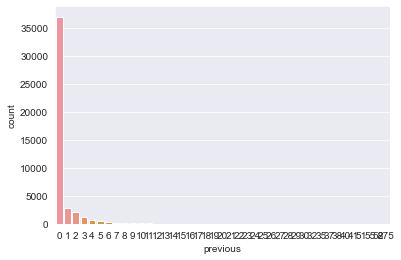

In [42]:
sns.countplot(df['previous'])

In [45]:
df['previous'].quantile([0.7,0.8,0.85,0.9,0.95,1])

0.70      0.0
0.80      0.0
0.85      1.0
0.90      2.0
0.95      3.0
1.00    275.0
Name: previous, dtype: float64

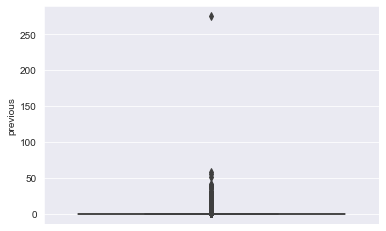

In [46]:
sns.boxplot(df['previous'],orient='vertical')

In [47]:
## 'previous' variable also has outliers

In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

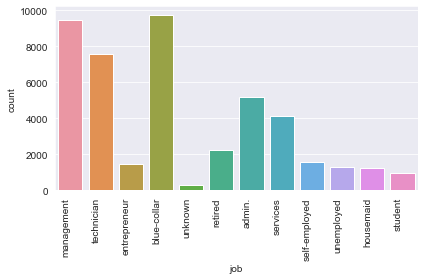

In [52]:
ax=sns.countplot(df['job'],orient='vertical')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

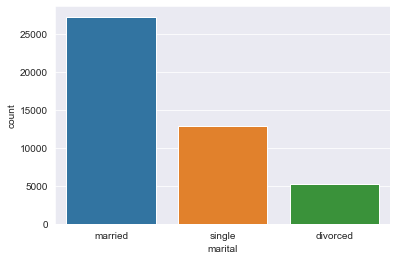

In [54]:
sns.countplot(df['marital'],orient='vertical')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#plt.tight_layout()
#plt.show()

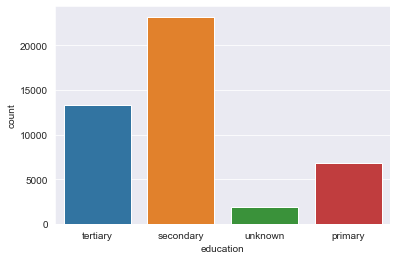

In [56]:
sns.countplot(df['education'],orient='vertical')


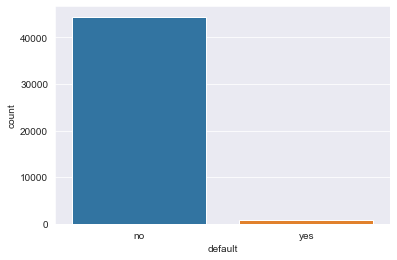

In [57]:
sns.countplot(df['default'])

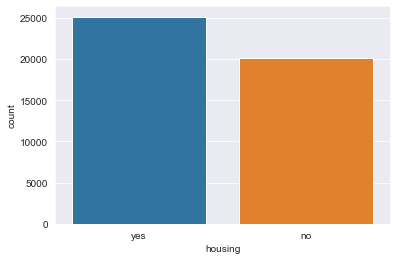

In [58]:
sns.countplot(df['housing'])

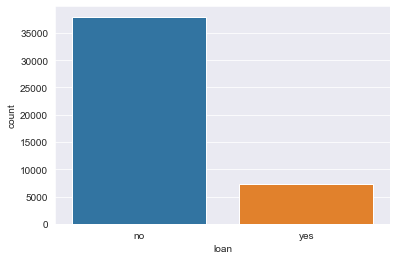

In [59]:
sns.countplot(df['loan'])

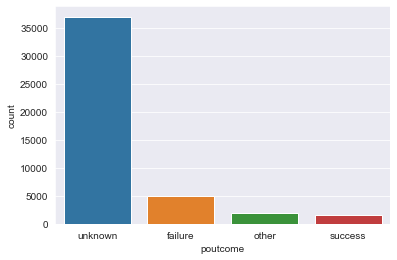

In [60]:
sns.countplot(df['poutcome'])

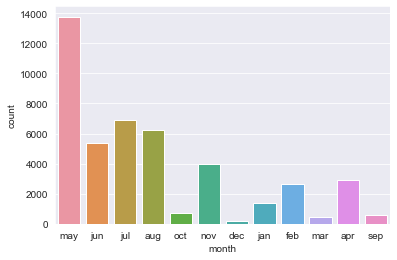

In [61]:
sns.countplot(df['month'])

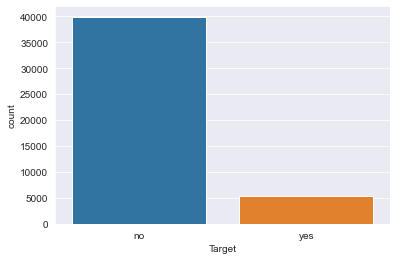

In [62]:
sns.countplot(df['Target'])

BiVariate Analysis